# Data Mining and machine Learning
# Experiment 10
## 26 March
# Name: Tufan Kundu
# Reg no.: 24MDT0184


## Q1. Download the dataset provided to you. The dataset ’data.csv’ gives you a dataset collected regarding the heart disease of a few individuals. ’1’ in the target column represents that the person has disease and ’0’ represents that the person doesn’t have heart disease

### Importing thenecessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Loading the dataset

In [2]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp10\data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


### Checking for missing values

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking for duplicate values

In [5]:
df.duplicated().sum()

1

### Dropping the duplicate record

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

### Minmax scaling

In [8]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)

In [9]:
x = x_scaled[:,:-1]
y = x_scaled[:,-1]

In [10]:
y

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0.])

### Perform PCA on the given data to reduce the data to 2 dimensions

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)
x_pca[:5]

array([[-0.23128005, -0.71417575],
       [-0.61962179,  0.46912865],
       [-0.06426909, -0.35839476],
       [ 0.69874407,  0.09173425],
       [-0.05076502, -0.30982993]])

## Fit different models using the given techniques to predict the target variables and compare the accuracy of the models

#### train test split of the data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

### Using Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy using Logistic Regression model: {accuracy_lr*100:.2f}%")

Accuracy using Logistic Regression model: 79.07%


### Using Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(f"Accuracy using Decision Tree model: {accuracy_dt*100:.2f}%")

Accuracy using Decision Tree model: 79.07%


### Using bagging

In [15]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)
y_pred_bc = bc.predict(x_test)
accuracy_bc = accuracy_score(y_test,y_pred_bc)
print(f"Accuracy using Bagging classifier model: {accuracy_bc*100:.2f}%")

Accuracy using Bagging classifier model: 76.74%


### Random forest using Hyper parameter tuning

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': [10, 50, 100, 200, 300, 400, 500, 700],
'max_depth': [3,5,7],
'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [17]:
print("Best Parameters:", best_params)
print(f"Best Cross-validation Accuracy:{ grid_search.best_score_*100:.2f}%")
print(f"Accuracy using random forest:{ accuracy_rf*100:.2f}%")


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Cross-validation Accuracy:77.38%
Accuracy using random forest:76.74%


### Using Adaboost with hyperparameter tuning

In [18]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {
'n_estimators': [10, 50, 75,100,125,150, 200, 400, 500],
'estimator__max_depth':[1,2,3]
}
base_model = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_model, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model_ab = grid_search.best_estimator_
y_pred_ab = best_model_ab.predict(x_test)

C:\Users\TUFAN\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [19]:
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Best Parameters:", best_params)
print(f"Best Cross-validation Accuracy of Adaboost classifier: {grid_search.best_score_*100:.2f}%")
print(f"Accuracy using Adaboost classifier:{ accuracy_ab*100:.2f}%")

Best Parameters: {'estimator__max_depth': 3, 'n_estimators': 10}
Best Cross-validation Accuracy of Adaboost classifier: 77.95%
Accuracy using Adaboost classifier:76.74%


### Gradient boosting with hyper parameter tuning

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
'n_estimators' : [25,50,100,200,250,300,400,450,500,700],
'learning_rate' : [0.1,0.5,0.01,0.05,0.08,0.001,0.005,0.008,0.0001,0.0005],
'max_depth' : [1,2,3,4,5,6,7,8,9,10],
}
gbc_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc_model, param_grid=param_grid,cv=5,scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.01, 0.05, 0.08, 0.001,
                                           0.005, 0.008, 0.0001, 0.0005],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [25, 50, 100, 200, 250, 300, 400, 450,
                                          500, 700]},
             scoring='accuracy')

In [21]:
best_params = grid_search.best_params_
best_model_gb = grid_search.best_estimator_
y_pred_gb = best_model_gb.predict(x_test)
print(f"Best parameters:\n{best_params}")
print(f"Best model:\n{best_model_gb}")
print(f"\nAccuracy score after hyperparameter tuning:{accuracy_score(y_test,y_pred_gb)*100:.2f} %")


Best parameters:
{'learning_rate': 0.005, 'max_depth': 1, 'n_estimators': 700}
Best model:
GradientBoostingClassifier(learning_rate=0.005, max_depth=1, n_estimators=700)

Accuracy score after hyperparameter tuning:79.07 %


### Find out the predictions in each case and print them

In [22]:
print(f"Accuracy using Logistic Regression model: {accuracy_lr*100:.2f}%")
print(f"Accuracy using Decision Tree model: {accuracy_dt*100:.2f}%")
print(f"Accuracy using Bagging classifier model: {accuracy_bc*100:.2f}%")
print(f"Accuracy using random forest:{ accuracy_rf*100:.2f}%")
print(f"Accuracy using Adaboost classifier:{ accuracy_ab*100:.2f}%")
print(f"Accuracy score GradientBooting classifier:{accuracy_score(y_test,y_pred_gb)*100:.2f} %")

Accuracy using Logistic Regression model: 79.07%
Accuracy using Decision Tree model: 79.07%
Accuracy using Bagging classifier model: 76.74%
Accuracy using random forest:76.74%
Accuracy using Adaboost classifier:76.74%
Accuracy score GradientBooting classifier:79.07 %


###  Also evaluate the model based on suitable performance measures other than accuracy

In [23]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score

## For Logistic regression
print("Logistic Regression:")
precision_lr = precision_score(y_test,y_pred_lr)
print(f"Precision of Logistic Regression model: {precision_lr*100:.2f}%")
recall_lr = recall_score(y_test,y_pred_lr)
print(f"Recall of Logistic Regression model: {recall_lr*100:.2f}%")
print(f"F1 score of Logistic regression model:{f1_score(y_test,y_pred_lr)*100:.2f}%")
print("Confusion matrix of Logistic regression model:\n",confusion_matrix(y_test,y_pred_lr))
print()
##For decision tree
print("Decision Tree:")
precision_dt = precision_score(y_test,y_pred_dt)
print(f"Precision of Decision Tree model: {precision_dt*100:.2f}%")
recall_dt = recall_score(y_test,y_pred_dt)
print(f"Recall of Decision Tree model: {recall_dt*100:.2f}%")
print(f"F1 score of Decision Tree model:{f1_score(y_test,y_pred_dt)*100:.2f}%")
print("Confusion matrix of Decision Tree model:\n",confusion_matrix(y_test,y_pred_dt))
print()
## For Bagging
print("Bagging classifier:")
precision_bg = precision_score(y_test,y_pred_bc)
print(f"Precision of Bagging classifier model: {precision_bg*100:.2f}%")
recall_bg = recall_score(y_test,y_pred_bc)
print(f"Recall of Bagging classifier model: {recall_bg*100:.2f}%")
print(f"F1 score of Bagging classifier model:{f1_score(y_test,y_pred_bc)*100:.2f}%")
print("Confusion matrix of Bagging classifier model:\n",confusion_matrix(y_test,y_pred_bc))
print()
## For Random Forest
print("Random Forest:")
precision_rf = precision_score(y_test,y_pred_rf)
print(f"Precision of Random Forest model: {precision_rf*100:.2f}%")
recall_rf = recall_score(y_test,y_pred_rf)
print(f"Recall of Random Forest model: {recall_rf*100:.2f}%")
print(f"F1 score of Random Forest model:{f1_score(y_test,y_pred_rf)*100:.2f}%")
print("Confusion matrix of Random Forest model:\n",confusion_matrix(y_test,y_pred_rf))
print()
## For Adaboost Classifier
print("Adaboost Classifier:")
precision_ab = precision_score(y_test,y_pred_ab)
print(f"Precision of Adaboost Classifier model: {precision_ab*100:.2f}%")
recall_ab = recall_score(y_test,y_pred_ab)
print(f"Recall of Adaboost Classifier model: {recall_ab*100:.2f}%")
print(f"F1 score of Adaboost Classifier model:{f1_score(y_test,y_pred_ab)*100:.2f}%")
print("Confusion matrix of Adaboost Classifier model:\n",confusion_matrix(y_test,y_pred_ab))
print()
## For GradientBoosting Classifier
print("GradientBoosting Classifier:")
precision_gb = precision_score(y_test,y_pred_gb)
print(f"Precision of GradientBoosting Classifier model: {precision_gb*100:.2f}%")
recall_gb = recall_score(y_test,y_pred_gb)
print(f"Recall of GradientBoosting Classifier model: {recall_gb*100:.2f}%")
print(f"F1 score of GradientBoosting Classifier model:{f1_score(y_test,y_pred_gb)*100:.2f}%")
print("Confusion matrix of GradientBoosting Classifier model:\n",confusion_matrix(y_test,y_pred_gb))
print()


Logistic Regression:
Precision of Logistic Regression model: 81.48%
Recall of Logistic Regression model: 84.62%
F1 score of Logistic regression model:83.02%
Confusion matrix of Logistic regression model:
 [[12  5]
 [ 4 22]]

Decision Tree:
Precision of Decision Tree model: 94.74%
Recall of Decision Tree model: 69.23%
F1 score of Decision Tree model:80.00%
Confusion matrix of Decision Tree model:
 [[16  1]
 [ 8 18]]

Bagging classifier:
Precision of Bagging classifier model: 86.36%
Recall of Bagging classifier model: 73.08%
F1 score of Bagging classifier model:79.17%
Confusion matrix of Bagging classifier model:
 [[14  3]
 [ 7 19]]

Random Forest:
Precision of Random Forest model: 86.36%
Recall of Random Forest model: 73.08%
F1 score of Random Forest model:79.17%
Confusion matrix of Random Forest model:
 [[14  3]
 [ 7 19]]

Adaboost Classifier:
Precision of Adaboost Classifier model: 86.36%
Recall of Adaboost Classifier model: 73.08%
F1 score of Adaboost Classifier model:79.17%
Confusio

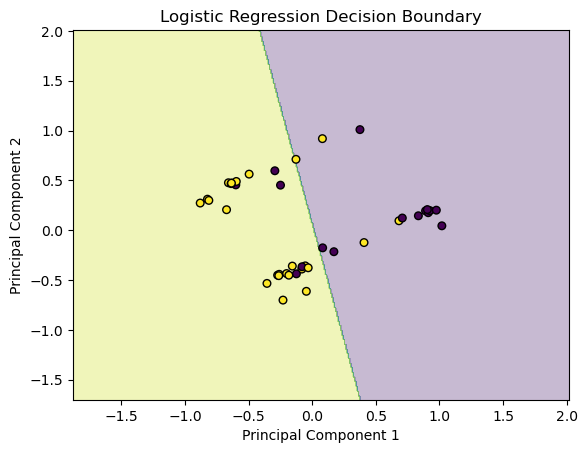

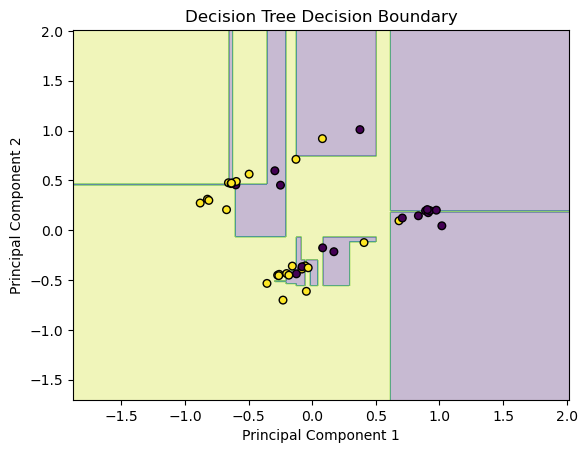

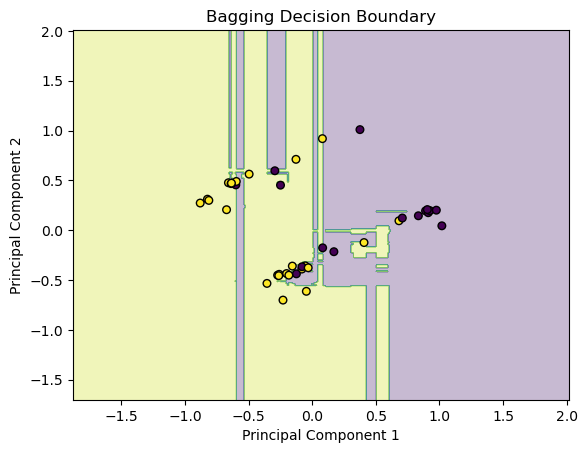

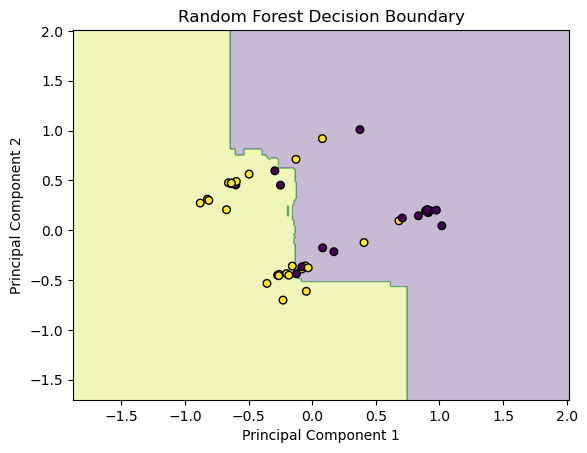

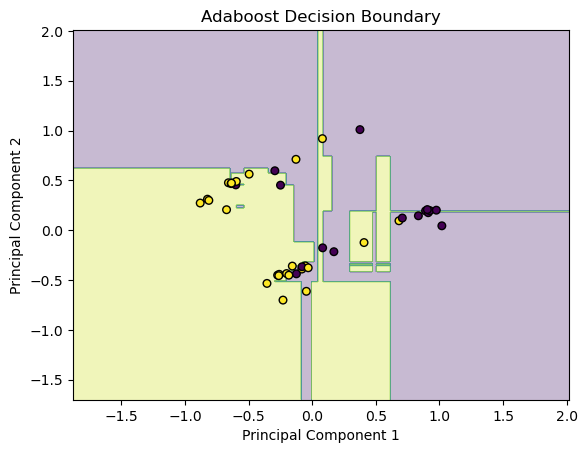

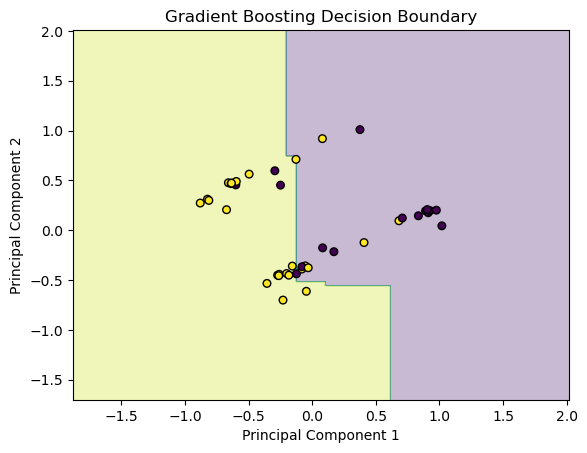

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap= 'viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot for each model
plot_decision_boundary(lr, x_test, y_test, "Logistic Regression Decision Boundary")
plot_decision_boundary(dt, x_test, y_test, "Decision Tree Decision Boundary")
plot_decision_boundary(bc, x_test, y_test, "Bagging Decision Boundary")
plot_decision_boundary(best_model_rf, x_test, y_test, "Random Forest Decision Boundary")
plot_decision_boundary(best_model_ab, x_test, y_test, "Adaboost Decision Boundary")
plot_decision_boundary(best_model_gb, x_test, y_test, "Gradient Boosting Decision Boundary")
